In [1]:
import pandas as pd 

#%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import pandas as pd


df= pd.read_csv("https://raw.githubusercontent.com/mhemmg/NeuralNetworkRSouzaCourse/master/Notebooks/extras/classes_MH/class_08/mnist_test.csv")
df.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [2]:
# Convirtiendo datos a formato numpy
df_np = df.to_numpy()
df_np.shape
# el array y tiene las etiquetas 
y_data = df[['label']].to_numpy()
# El array que contiene los números 
X_data=df.loc[:, df.columns.drop('label')].to_numpy()

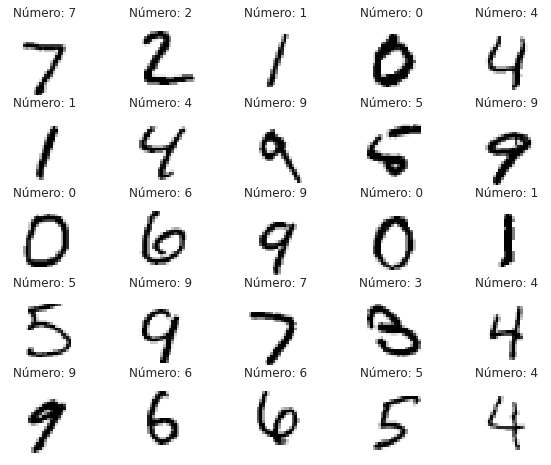

In [3]:
#Graficas 
_, axes = plt.subplots(nrows=5,ncols=5, figsize=(10, 8))
for ax, image, label in zip(axes.ravel(),X_data, y_data):
    ax.set_axis_off()
    image = image.reshape(28, 28)
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="none" )
    ax.set_title("Número: %i" % label)



In [4]:
# Dividimos los datos en entrenamiento y prueba
from sklearn.model_selection import train_test_split

Xtrain, Xtest, ytrain, ytest = train_test_split(X_data, y_data,random_state=0)

ytrain= ytrain.ravel()


In [5]:
# Definimos la configuración del clasificador
from sklearn.linear_model import LogisticRegression

logisticRegr = LogisticRegression(solver='saga')

In [6]:
#Entrenamiento
logisticRegr.fit(Xtrain,ytrain )

/usr/lib64/python3.7/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(solver='saga')

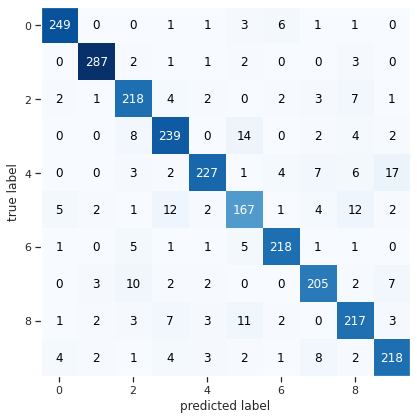

In [7]:
# Matriz de confusión 


from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
ypred = logisticRegr.predict(Xtest)
matriz = confusion_matrix(ytest,ypred)

plot_confusion_matrix(conf_mat=matriz, figsize=(6,6), show_normed=False)
plt.tight_layout()



In [8]:
#Métricas para evaluar la calidad de nuestra predicción
from sklearn.metrics import classification_report
print(classification_report(ytest, ypred,))




              precision    recall  f1-score   support

           0       0.95      0.95      0.95       262
           1       0.97      0.97      0.97       296
           2       0.87      0.91      0.89       240
           3       0.88      0.89      0.88       269
           4       0.94      0.85      0.89       267
           5       0.81      0.80      0.81       208
           6       0.93      0.94      0.93       233
           7       0.89      0.89      0.89       231
           8       0.85      0.87      0.86       249
           9       0.87      0.89      0.88       245

    accuracy                           0.90      2500
   macro avg       0.90      0.90      0.90      2500
weighted avg       0.90      0.90      0.90      2500



In [9]:
Xtrain.shape

(7500, 784)